# RBM Recommender system, training and example

In [1]:
from src.eval import evaluate_rbm, evaluate_dbn
from src.data_preprocessing import load_data, preprocess_data, load_movies
from src.models import RBM, DBN
from src.training import train_rbm, train_dbn
from src.plot_utils import plot_training_loss
from sklearn.model_selection import train_test_split
from src.utils import recommend, movie_from_tensor, quantize, test_recommendation_ability
import torch
import random
import copy

## TRAINING
First we intialize our dataset and parameters. In our dataset, movies user hasn't watched are marked as 0 and rates are scaled from 1-5 to (0, 1].

In [2]:
file_path = "data\\ml-100k\\u.data"
data = load_data(file_path)
interaction_matrix = preprocess_data(data)


interaction_tensor = torch.tensor(interaction_matrix.values, dtype=torch.float32)
train_data, test_data = train_test_split(interaction_tensor.numpy(), test_size=0.2, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_visible = interaction_tensor.shape[1]
num_hidden = 200
num_hidden2 = 100

Next we train RBM on the given dataset.

Epoch 1/40: 100%|██████████| 48/48 [00:03<00:00, 14.18it/s, Loss=0.234]


Reconstruction Loss: 0.3069


Epoch 2/40: 100%|██████████| 48/48 [00:03<00:00, 14.44it/s, Loss=0.198]


Reconstruction Loss: 0.2161


Epoch 3/40: 100%|██████████| 48/48 [00:03<00:00, 14.04it/s, Loss=0.19] 


Reconstruction Loss: 0.1865


Epoch 4/40: 100%|██████████| 48/48 [00:03<00:00, 14.65it/s, Loss=0.147]


Reconstruction Loss: 0.1667


Epoch 5/40: 100%|██████████| 48/48 [00:03<00:00, 13.99it/s, Loss=0.169]


Reconstruction Loss: 0.1541


Epoch 6/40: 100%|██████████| 48/48 [00:03<00:00, 14.70it/s, Loss=0.133]


Reconstruction Loss: 0.1410


Epoch 7/40: 100%|██████████| 48/48 [00:03<00:00, 14.55it/s, Loss=0.114]


Reconstruction Loss: 0.1308


Epoch 8/40: 100%|██████████| 48/48 [00:03<00:00, 14.55it/s, Loss=0.123]


Reconstruction Loss: 0.1221


Epoch 9/40: 100%|██████████| 48/48 [00:03<00:00, 13.27it/s, Loss=0.109]


Reconstruction Loss: 0.1142


Epoch 10/40: 100%|██████████| 48/48 [00:03<00:00, 14.50it/s, Loss=0.111] 


Reconstruction Loss: 0.1073


Epoch 11/40: 100%|██████████| 48/48 [00:03<00:00, 13.56it/s, Loss=0.0957]


Reconstruction Loss: 0.1007


Epoch 12/40: 100%|██████████| 48/48 [00:03<00:00, 13.93it/s, Loss=0.0711]


Reconstruction Loss: 0.0946


Epoch 13/40: 100%|██████████| 48/48 [00:03<00:00, 14.28it/s, Loss=0.0843]


Reconstruction Loss: 0.0901


Epoch 14/40: 100%|██████████| 48/48 [00:03<00:00, 14.75it/s, Loss=0.11]  


Reconstruction Loss: 0.0863


Epoch 15/40: 100%|██████████| 48/48 [00:03<00:00, 13.58it/s, Loss=0.0789]


Reconstruction Loss: 0.0810


Epoch 16/40: 100%|██████████| 48/48 [00:03<00:00, 14.36it/s, Loss=0.108] 


Reconstruction Loss: 0.0778


Epoch 17/40: 100%|██████████| 48/48 [00:03<00:00, 13.89it/s, Loss=0.0917]


Reconstruction Loss: 0.0740


Epoch 18/40: 100%|██████████| 48/48 [00:03<00:00, 14.06it/s, Loss=0.0655]


Reconstruction Loss: 0.0713


Epoch 19/40: 100%|██████████| 48/48 [00:03<00:00, 13.98it/s, Loss=0.0684]


Reconstruction Loss: 0.0681


Epoch 20/40: 100%|██████████| 48/48 [00:03<00:00, 13.81it/s, Loss=0.0747]


Reconstruction Loss: 0.0668


Epoch 21/40: 100%|██████████| 48/48 [00:03<00:00, 13.63it/s, Loss=0.0771]


Reconstruction Loss: 0.0649


Epoch 22/40: 100%|██████████| 48/48 [00:03<00:00, 13.97it/s, Loss=0.0304]


Reconstruction Loss: 0.0615


Epoch 23/40: 100%|██████████| 48/48 [00:03<00:00, 13.62it/s, Loss=0.055] 


Reconstruction Loss: 0.0604


Epoch 24/40: 100%|██████████| 48/48 [00:03<00:00, 14.10it/s, Loss=0.0602]


Reconstruction Loss: 0.0591


Epoch 25/40: 100%|██████████| 48/48 [00:03<00:00, 13.67it/s, Loss=0.0307]


Reconstruction Loss: 0.0573


Epoch 26/40: 100%|██████████| 48/48 [00:03<00:00, 13.40it/s, Loss=0.03]  


Reconstruction Loss: 0.0570


Epoch 27/40: 100%|██████████| 48/48 [00:03<00:00, 14.36it/s, Loss=0.039] 


Reconstruction Loss: 0.0550


Epoch 28/40: 100%|██████████| 48/48 [00:03<00:00, 13.88it/s, Loss=0.0575]


Reconstruction Loss: 0.0544


Epoch 29/40: 100%|██████████| 48/48 [00:03<00:00, 14.09it/s, Loss=0.0532]


Reconstruction Loss: 0.0532


Epoch 30/40: 100%|██████████| 48/48 [00:03<00:00, 14.04it/s, Loss=0.0512]


Reconstruction Loss: 0.0524


Epoch 31/40: 100%|██████████| 48/48 [00:03<00:00, 14.24it/s, Loss=0.032] 


Reconstruction Loss: 0.0507


Epoch 32/40: 100%|██████████| 48/48 [00:03<00:00, 14.15it/s, Loss=0.0673]


Reconstruction Loss: 0.0505


Epoch 33/40: 100%|██████████| 48/48 [00:03<00:00, 13.72it/s, Loss=0.0218]


Reconstruction Loss: 0.0488


Epoch 34/40: 100%|██████████| 48/48 [00:03<00:00, 14.24it/s, Loss=0.0576]


Reconstruction Loss: 0.0488


Epoch 35/40: 100%|██████████| 48/48 [00:03<00:00, 13.57it/s, Loss=0.0205]


Reconstruction Loss: 0.0467


Epoch 36/40: 100%|██████████| 48/48 [00:03<00:00, 13.55it/s, Loss=0.0622]


Reconstruction Loss: 0.0473


Epoch 37/40: 100%|██████████| 48/48 [00:03<00:00, 13.72it/s, Loss=0.0315]


Reconstruction Loss: 0.0459


Epoch 38/40: 100%|██████████| 48/48 [00:03<00:00, 13.62it/s, Loss=0.0359]


Reconstruction Loss: 0.0457


Epoch 39/40: 100%|██████████| 48/48 [00:03<00:00, 13.36it/s, Loss=0.0382]


Reconstruction Loss: 0.0450


Epoch 40/40: 100%|██████████| 48/48 [00:03<00:00, 13.83it/s, Loss=0.062] 


Reconstruction Loss: 0.0449


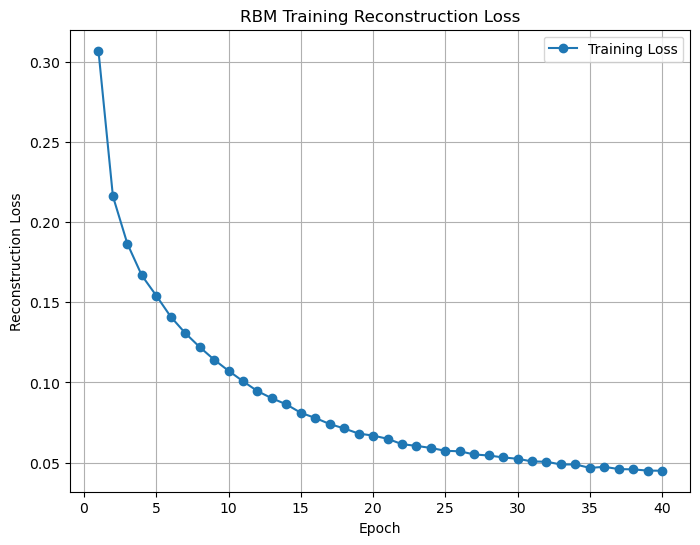

Validation loss: 0.04341442897797577
Validation accuracy: 74.60946592932324%


In [3]:
rbm = RBM(num_visible=num_visible, num_hidden=num_hidden, device=device)

losses = train_rbm(rbm, train_data, epochs=40, learning_rate=0.01, k=10, batch_size=16)

plot_training_loss(losses, title="RBM Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")
loss, acc = evaluate_rbm(rbm, test_data, device)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {acc*100}%")

Furthermore, we train DBN on the same dataset. The goal is to compare them.

Epoch 0/30: 100%|██████████| 48/48 [00:00<00:00, 120.53it/s, Loss=0.345]


Reconstruction Loss: 0.3970


Epoch 1/30: 100%|██████████| 48/48 [00:00<00:00, 126.88it/s, Loss=0.308]


Reconstruction Loss: 0.3085


Epoch 2/30: 100%|██████████| 48/48 [00:00<00:00, 126.86it/s, Loss=0.222]


Reconstruction Loss: 0.2720


Epoch 3/30: 100%|██████████| 48/48 [00:00<00:00, 128.00it/s, Loss=0.292]


Reconstruction Loss: 0.2543


Epoch 4/30: 100%|██████████| 48/48 [00:00<00:00, 133.76it/s, Loss=0.245]


Reconstruction Loss: 0.2397


Epoch 5/30: 100%|██████████| 48/48 [00:00<00:00, 133.59it/s, Loss=0.252]


Reconstruction Loss: 0.2280


Epoch 6/30: 100%|██████████| 48/48 [00:00<00:00, 138.77it/s, Loss=0.172]


Reconstruction Loss: 0.2147


Epoch 7/30: 100%|██████████| 48/48 [00:00<00:00, 134.78it/s, Loss=0.19] 


Reconstruction Loss: 0.2085


Epoch 8/30: 100%|██████████| 48/48 [00:00<00:00, 128.62it/s, Loss=0.21] 


Reconstruction Loss: 0.2036


Epoch 9/30: 100%|██████████| 48/48 [00:00<00:00, 123.78it/s, Loss=0.192]


Reconstruction Loss: 0.1945


Epoch 10/30: 100%|██████████| 48/48 [00:00<00:00, 134.12it/s, Loss=0.14] 


Reconstruction Loss: 0.1888


Epoch 11/30: 100%|██████████| 48/48 [00:00<00:00, 133.88it/s, Loss=0.25] 


Reconstruction Loss: 0.1839


Epoch 12/30: 100%|██████████| 48/48 [00:00<00:00, 135.94it/s, Loss=0.16] 


Reconstruction Loss: 0.1778


Epoch 13/30: 100%|██████████| 48/48 [00:00<00:00, 129.06it/s, Loss=0.153]


Reconstruction Loss: 0.1749


Epoch 14/30: 100%|██████████| 48/48 [00:00<00:00, 133.93it/s, Loss=0.145]


Reconstruction Loss: 0.1680


Epoch 15/30: 100%|██████████| 48/48 [00:00<00:00, 130.89it/s, Loss=0.237]


Reconstruction Loss: 0.1656


Epoch 16/30: 100%|██████████| 48/48 [00:00<00:00, 127.97it/s, Loss=0.0725]


Reconstruction Loss: 0.1592


Epoch 17/30: 100%|██████████| 48/48 [00:00<00:00, 125.79it/s, Loss=0.145]


Reconstruction Loss: 0.1554


Epoch 18/30: 100%|██████████| 48/48 [00:00<00:00, 134.95it/s, Loss=0.02]  


Reconstruction Loss: 0.1503


Epoch 19/30: 100%|██████████| 48/48 [00:00<00:00, 135.50it/s, Loss=0.0175]


Reconstruction Loss: 0.1483


Epoch 20/30: 100%|██████████| 48/48 [00:00<00:00, 134.13it/s, Loss=0.155] 


Reconstruction Loss: 0.1513


Epoch 21/30: 100%|██████████| 48/48 [00:00<00:00, 130.32it/s, Loss=0.125] 


Reconstruction Loss: 0.1501


Epoch 22/30: 100%|██████████| 48/48 [00:00<00:00, 130.66it/s, Loss=0.278] 


Reconstruction Loss: 0.1499


Epoch 23/30: 100%|██████████| 48/48 [00:00<00:00, 128.09it/s, Loss=0.0025]


Reconstruction Loss: 0.1440


Epoch 24/30: 100%|██████████| 48/48 [00:00<00:00, 129.34it/s, Loss=0]     


Reconstruction Loss: 0.1429


Epoch 25/30: 100%|██████████| 48/48 [00:00<00:00, 123.53it/s, Loss=0.248]


Reconstruction Loss: 0.1477


Epoch 26/30: 100%|██████████| 48/48 [00:00<00:00, 122.62it/s, Loss=0.168] 


Reconstruction Loss: 0.1472


Epoch 27/30: 100%|██████████| 48/48 [00:00<00:00, 133.67it/s, Loss=0.172] 


Reconstruction Loss: 0.1457


Epoch 28/30: 100%|██████████| 48/48 [00:00<00:00, 136.74it/s, Loss=0.105]


Reconstruction Loss: 0.1431


Epoch 29/30: 100%|██████████| 48/48 [00:00<00:00, 139.90it/s, Loss=0.278] 


Reconstruction Loss: 0.1485


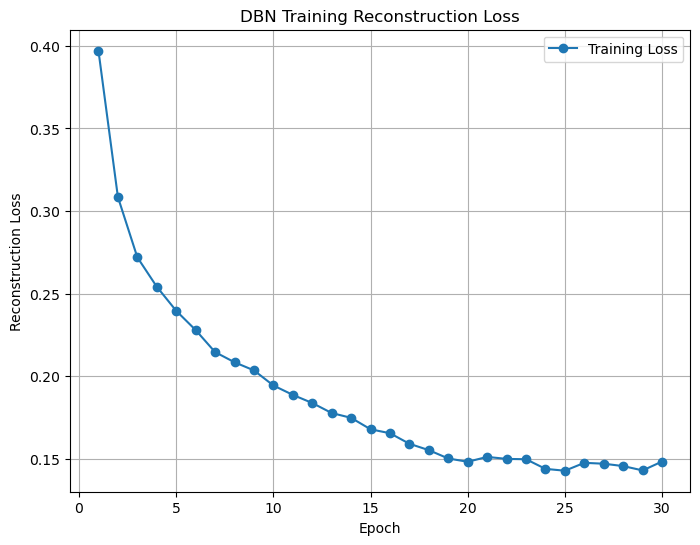

Validation loss: 0.0415
Validation accuracy: 75.10%


In [4]:
rbm_for_dbn = copy.deepcopy(rbm)
dbn = DBN(rbm_for_dbn, num_hidden2, device=device)

losses = train_dbn(dbn, train_data, epochs=30, learning_rate=0.01, batch_size=16)

plot_training_loss(losses, title="DBN Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")

loss, acc = evaluate_dbn(dbn, test_data, device)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {acc*100:.2f}%")

## RECOMMENDATION ACCURACY
Validation accuracies from above are actually reconstruction accuracies.
Now we will take users from test data, hide some of their ratings and check if the movies our models recommend were actually rated with high rates.

In [5]:
hide_fraction = 0.2 
accuracy = test_recommendation_ability(rbm, test_data, device, hide_fraction=hide_fraction, k=10)
print(f"Recommendation accuracy: {accuracy*100:.2f}%")

Recommendation accuracy: 89.61%


In [6]:
accuracy = test_recommendation_ability(dbn, test_data, device, hide_fraction=hide_fraction, k=10)
print(f"Recommendation accuracy: {accuracy*100:.2f}%")

Recommendation accuracy: 91.86%


## USAGE EXAMPLE
First, we load the movies dataframe.

In [7]:
movies = load_movies("data\\ml-100k\\u.item")

Now, we pick a random user and print movies they liked (rate >=3 means they liked the movie).

In [14]:
random_user = random.randint(1, len(test_data))
rates = test_data[random_user]
movie_from_tensor(rates, movies)

'Twelve Monkeys (1995)' has the following genre:
['Drama', 'Sci-Fi']
--------------------------------------------------
'Usual Suspects, The (1995)' has the following genre:
['Crime', 'Thriller']
--------------------------------------------------
'Apollo 13 (1995)' has the following genre:
['Action', 'Drama', 'Thriller']
--------------------------------------------------
'Crumb (1994)' has the following genre:
['Documentary']
--------------------------------------------------
'Pulp Fiction (1994)' has the following genre:
['Crime', 'Drama']
--------------------------------------------------
'Three Colors: Red (1994)' has the following genre:
['Drama']
--------------------------------------------------
'Shawshank Redemption, The (1994)' has the following genre:
['Drama']
--------------------------------------------------
'Hudsucker Proxy, The (1994)' has the following genre:
['Comedy', 'Romance']
--------------------------------------------------
'Blade Runner (1982)' has the following 

Now, the idea is to reconstruct the users watched list, and keep the probabilities from reconstruction. We pick the largest n=5 probabilities of movies the user has not watched as recommendation.

First we use RBM.

In [15]:
_,h = rbm.forward(rates)
probs, v = rbm.backward(h)

watched = torch.zeros_like(rates)
watched[rates != 0] = 1
to_recommend = recommend(watched, probs, 5)
movie_from_tensor(to_recommend.cpu(), movies)

'Fugitive, The (1993)' has the following genre:
['Action', 'Thriller']
--------------------------------------------------
'Indiana Jones and the Last Crusade (1989)' has the following genre:
['Action', 'Adventure']
--------------------------------------------------
'Grosse Pointe Blank (1997)' has the following genre:
['Comedy', 'Crime']
--------------------------------------------------
'Up Close and Personal (1996)' has the following genre:
['Drama', 'Romance']
--------------------------------------------------
'Air Force One (1997)' has the following genre:
['Action', 'Thriller']
--------------------------------------------------


Then we use DBN.

In [16]:
h_prob1_up, h_sample1_up, h_prob2_up, h_sample2_up = dbn.forward(watched)
h_sample2_down = h_sample2_up.clone()
for _ in range(1):
    h_prob1_down, h_sample1_down = dbn.rbm2.backward(h_sample2_down)
    h_prob2_down, h_sample2_down = dbn.rbm2.forward(h_sample1_down)

probs, v = dbn.rbm1.backward(h_sample1_down)
to_recommend = recommend(watched, probs, 5)
movie_from_tensor(to_recommend.cpu(), movies)

'Rumble in the Bronx (1995)' has the following genre:
['Action', 'Adventure', 'Crime']
--------------------------------------------------
'Gattaca (1997)' has the following genre:
['Drama', 'Sci-Fi', 'Thriller']
--------------------------------------------------
'My Left Foot (1989)' has the following genre:
['Drama']
--------------------------------------------------
'How to Make an American Quilt (1995)' has the following genre:
['Drama', 'Romance']
--------------------------------------------------
'I Love Trouble (1994)' has the following genre:
['Action', 'Comedy']
--------------------------------------------------


We see there are couple of movies that both RBM and DBN recommend.